In [74]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
from src.database.postgres_session import get_postgres_connection
engine = get_postgres_connection()

In [77]:
df = pd.read_sql('''select * from customer_churn_summary''', engine)

In [78]:
df

,acct_id,years,churn,risk,currency,ave_bal,scheme,mobile_app,internet_banking,ussd_banking,digital_loan,unsecured_loan,termloan,credit_card,subsegment,credit_vol,debit_vol,debit_val,credit_val,digital_channels_used
0,Account_0,10,0,LOW,NGN,302.34,ODA,0,0,0,0,0,0,0,product7,0,0,0.00,0.0,0
1,Account_1,7,1,LOW,NGN,640.55,SBA,1,1,0,0,0,0,0,product7,23,84,1641781.54,1650610.0,2
2,Account_2,12,1,MEDIUM,NGN,2549.96,SBA,0,0,1,0,0,0,0,product6,0,2,5427.50,0.0,1
3,Account_3,12,0,MEDIUM,USD,9999.17,ODA,0,1,1,0,0,0,0,product6,0,0,0.00,0.0,2
4,Account_4,12,1,MEDIUM,NGN,455.25,SBA,1,1,1,0,0,0,0,product8,439,116,6768632.00,6784830.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433981,Account_489069,5,0,MEDIUM,NGN,3046.39,SBA,0,0,0,0,0,0,0,product6,0,0,0.00,0.0,0
433982,Account_489070,8,0,MEDIUM,NGN,106.60,ODA,0,0,0,0,0,0,0,product7,0,0,0.00,0.0,0
433983,Account_489071,9,1,LOW,NGN,33.72,SBA,0,0,1,0,0,0,0,product5,142,91,296204.03,294710.0,1
433984,Account_489072,4,0,LOW,NGN,60.58,SBA,1,0,1,0,0,0,0,product5,0,0,0.00,0.0,2


# Exploratory Data Analysis

- Here we will analyze the summary table to gain insights into the distribution of each column. This will help us to understand underlying data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
years,433986.0,6.356700e+00,3.576826e+00,0.0,4.00,6.00,9.000000e+00,1.200000e+01
churn,433986.0,5.507620e-01,4.974171e-01,0.0,0.00,1.00,1.000000e+00,1.000000e+00
ave_bal,433986.0,1.691059e+05,1.242282e+07,-689000000.0,209.43,1091.03,7.113312e+03,7.693634e+09
mobile_app,433986.0,3.447254e-01,4.752792e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00
internet_banking,433986.0,4.107206e-01,4.919652e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00
ussd_banking,433986.0,4.991567e-01,4.999999e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00
digital_loan,433986.0,2.609301e-02,1.594121e-01,0.0,0.00,0.00,0.000000e+00,1.000000e+00
unsecured_loan,433986.0,1.020770e-02,1.005163e-01,0.0,0.00,0.00,0.000000e+00,1.000000e+00
termloan,433986.0,5.253626e-04,2.291479e-02,0.0,0.00,0.00,0.000000e+00,1.000000e+00
credit_card,433986.0,2.083017e-03,4.559257e-02,0.0,0.00,0.00,0.000000e+00,1.000000e+00


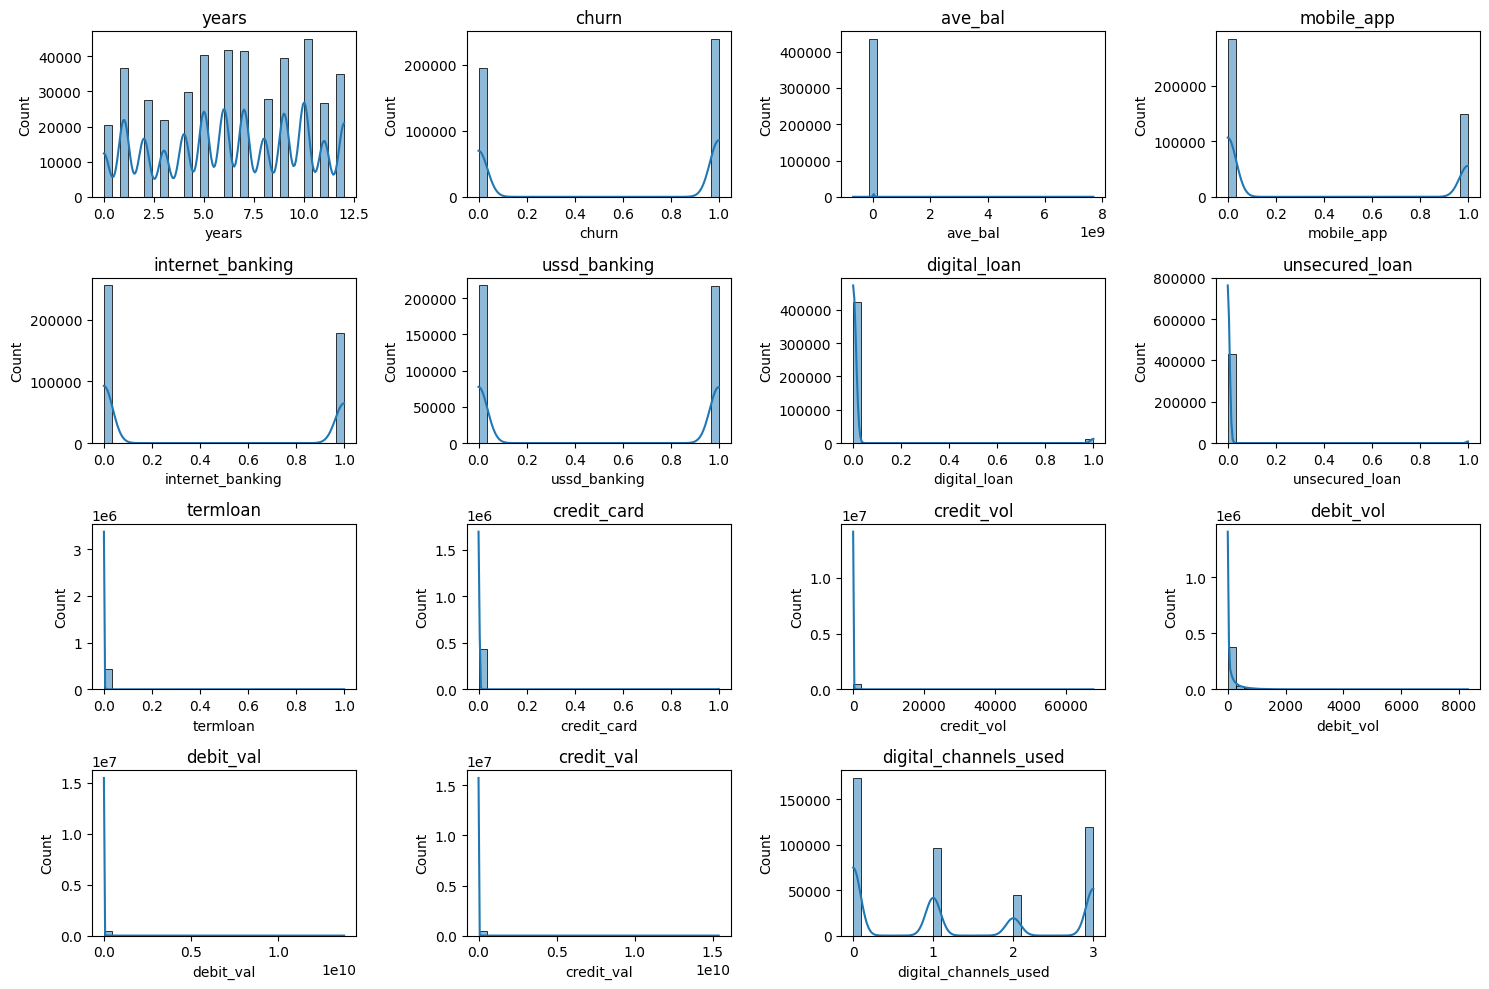

In [80]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

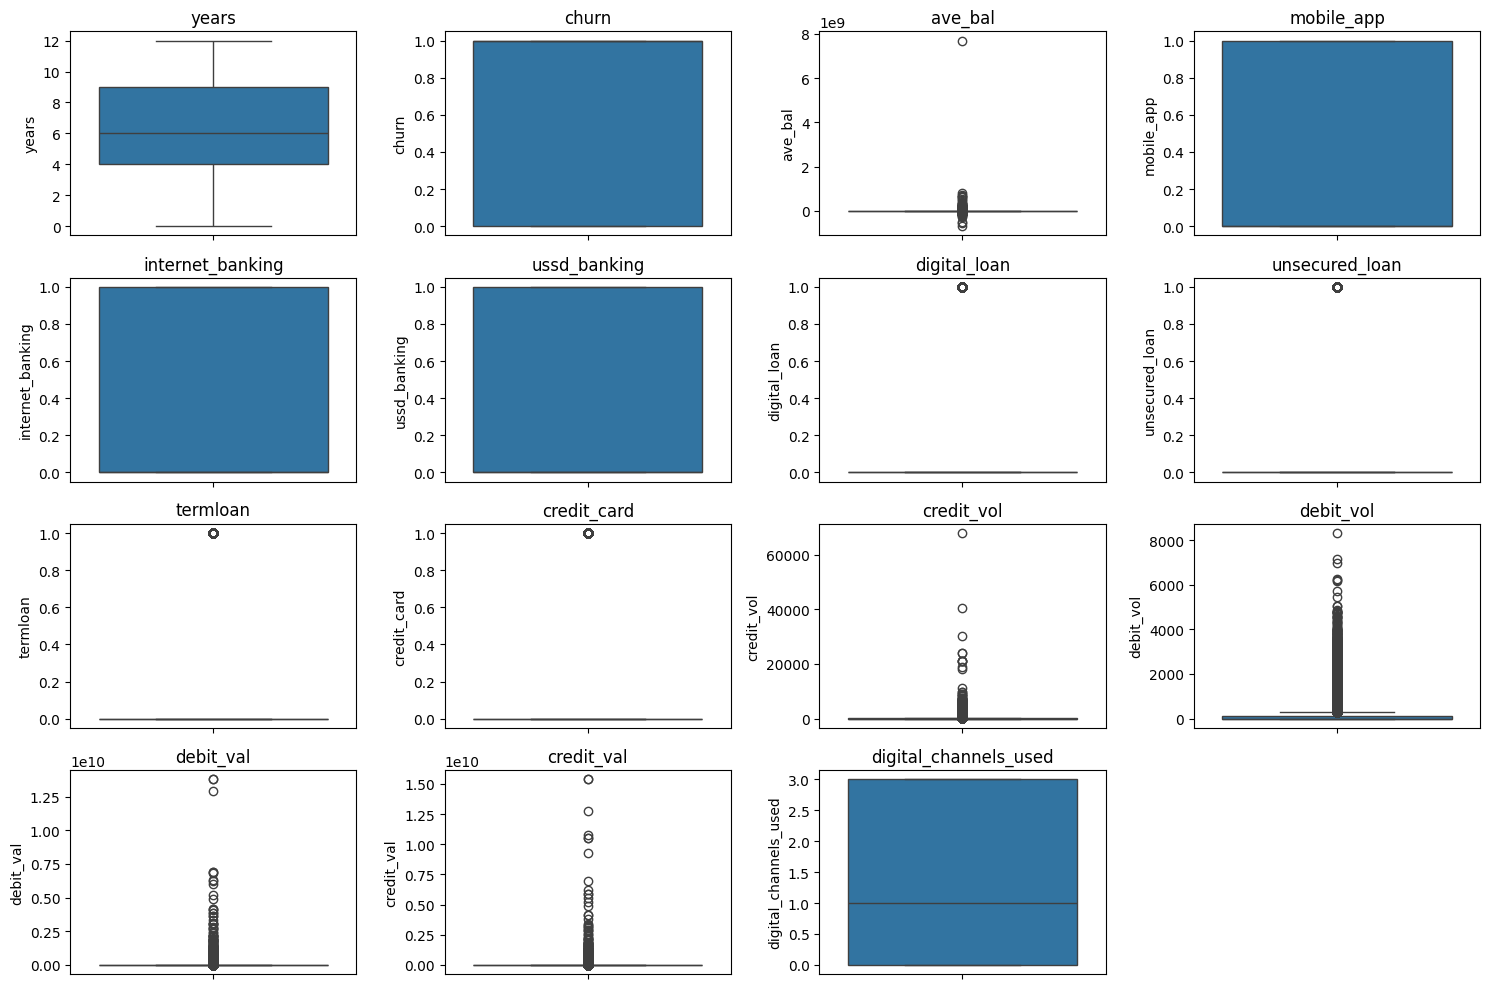

In [81]:
#Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Statistics Insights

- Negative and zero values
1. Average Balance: Minimum value is -689000000 which indicates overdraft. Some accounts may be taking out loans or having overdrafts from ATM withdrawals, debit card purchases, or automatic payments, with banks sometimes covering the overage and allowing the balance to become negative, incurring fees.
2. Debit Volume and Debit Value: A large no.of accounts with 0 debit transactions show that the account is not being used for debit purposes, leading to not earning transaction commissions from merchants.
3. Credit Volume and Credit Value: A large no.of accounts with 0 credit transactions show that the account is not being used to deposit money into the account.

- Outliers indicated by High Standard Deviations
1. Average Balance: The max value 7.6B is significantly higher than the mean 169,105.9, which shows potential high value individuals.
2. Debit Value and Credit Value: Very High debit value and credit value of 13.7B and 15.3B respectively into accounts indicates that these accounts could be of businesses which have high trade volume throughout the year.

In [82]:
df = pd.read_sql("""
                 select * from customer_churn_summary
                 where ave_bal >= 0
                 """, engine)
df

,acct_id,years,churn,risk,currency,ave_bal,scheme,mobile_app,internet_banking,ussd_banking,digital_loan,unsecured_loan,termloan,credit_card,subsegment,credit_vol,debit_vol,debit_val,credit_val,digital_channels_used
0,Account_0,10,0,LOW,NGN,302.34,ODA,0,0,0,0,0,0,0,product7,0,0,0.00,0.0,0
1,Account_1,7,1,LOW,NGN,640.55,SBA,1,1,0,0,0,0,0,product7,23,84,1641781.54,1650610.0,2
2,Account_2,12,1,MEDIUM,NGN,2549.96,SBA,0,0,1,0,0,0,0,product6,0,2,5427.50,0.0,1
3,Account_3,12,0,MEDIUM,USD,9999.17,ODA,0,1,1,0,0,0,0,product6,0,0,0.00,0.0,2
4,Account_4,12,1,MEDIUM,NGN,455.25,SBA,1,1,1,0,0,0,0,product8,439,116,6768632.00,6784830.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411147,Account_489069,5,0,MEDIUM,NGN,3046.39,SBA,0,0,0,0,0,0,0,product6,0,0,0.00,0.0,0
411148,Account_489070,8,0,MEDIUM,NGN,106.60,ODA,0,0,0,0,0,0,0,product7,0,0,0.00,0.0,0
411149,Account_489071,9,1,LOW,NGN,33.72,SBA,0,0,1,0,0,0,0,product5,142,91,296204.03,294710.0,1
411150,Account_489072,4,0,LOW,NGN,60.58,SBA,1,0,1,0,0,0,0,product5,0,0,0.00,0.0,2


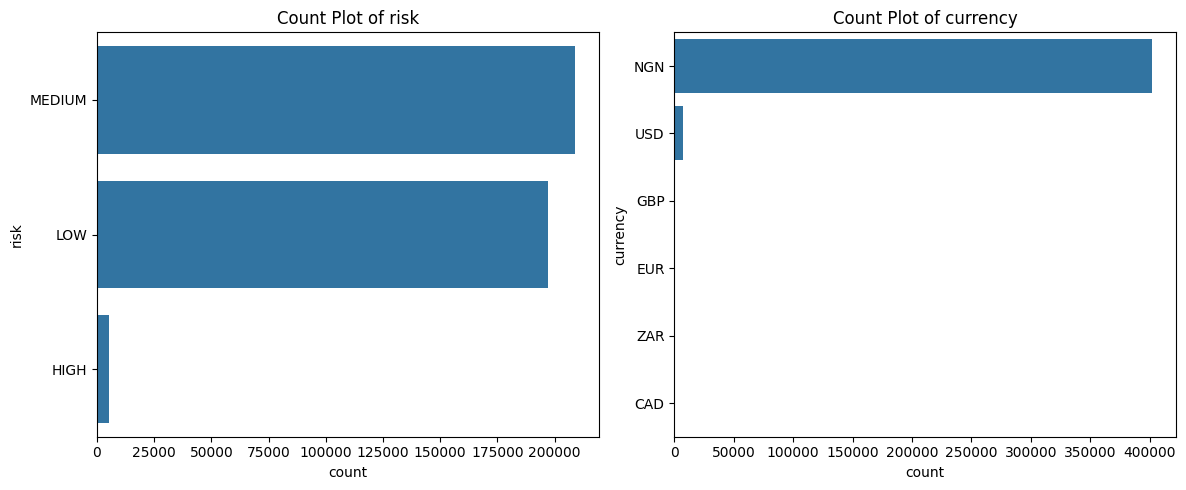

In [83]:
#Count Plots for Categorical Columns
categorical_cols = ["risk", "currency"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(data=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

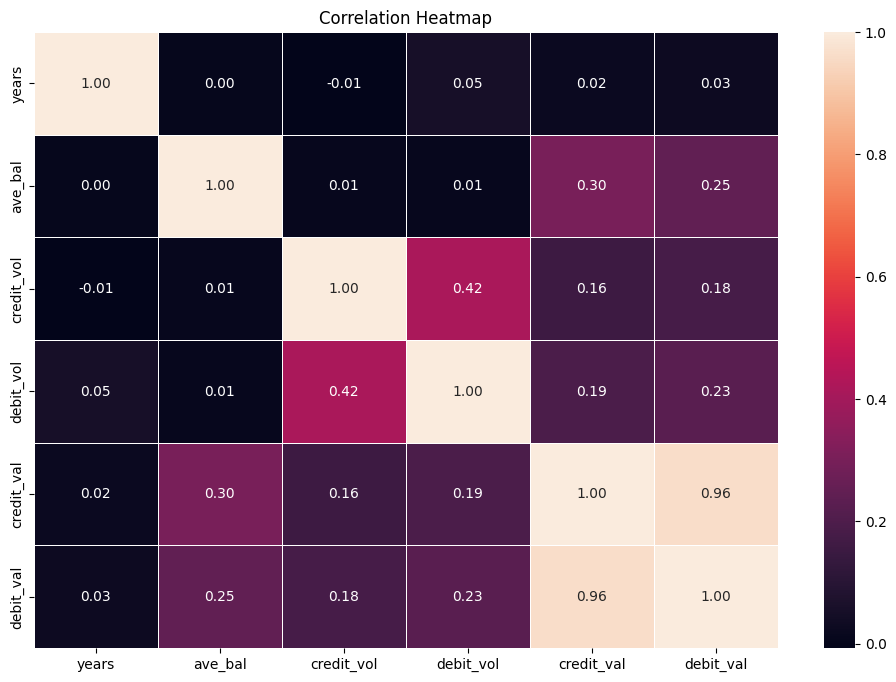

In [84]:
#Correlation Heatmap
numerical_cols = ['years', 'ave_bal', 'credit_vol', 'debit_vol', 'credit_val', 'debit_val']
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights

- Credit Value and Debit Value have high correlation with each other, suggesting that the accounts with transactions are actively using the bank's services.
- No. of years has no effect on the accounts usage. This could mean that old accounts necessarily does not mean active users.

In [85]:
churn_rate = round((df['churn'].sum()/df['churn'].count()*100), 2)
print(f"The churn rate is {churn_rate}%.")

The churn rate is 53.97%.


## Data Analysis

### Churn rate is 53.97%. Which customer behaviors are driving churn, and which ones protect against it?

#### Years vs Churn

In [150]:
years_churn = df.groupby("years")['churn'].agg(churn='sum', count='count')
years_churn['churn_rate'] = years_churn['churn']/years_churn['count']*100
years_churn = years_churn.reset_index().sort_values('churn_rate', ascending=False)
years_churn

,years,churn,count,churn_rate
0,0,18191,18608,97.759028
1,1,24197,34706,69.719933
2,2,18114,27220,66.546657
12,12,19861,32555,61.007526
3,3,13060,21495,60.758316
4,4,16768,28993,57.834650
11,11,12309,23934,51.428930
5,5,19654,39283,50.031820
6,6,18672,40494,46.110535
10,10,18187,40305,45.123434


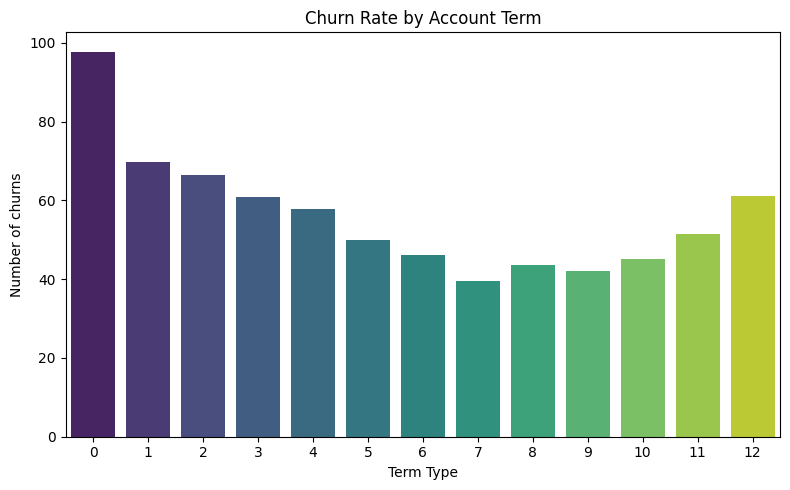

In [146]:
plt.figure(figsize=(8,5))
sns.barplot(data=years_churn, x='years', y='churn_rate', palette='viridis')
plt.title('Churn Rate by Account Term')
plt.ylabel('Number of churns')
plt.xlabel('Term Type')
plt.tight_layout()
plt.show()

In [151]:
years_churn['term_type'] = pd.cut(
    years_churn['years'],
    bins=[0, 5, 10, float('inf')],
    labels=['Short_term', 'Mid_term', 'Long_term'],
    right=False
)
years_churn


,years,churn,count,churn_rate,term_type
0,0,18191,18608,97.759028,Short_term
1,1,24197,34706,69.719933,Short_term
2,2,18114,27220,66.546657,Short_term
12,12,19861,32555,61.007526,Long_term
3,3,13060,21495,60.758316,Short_term
4,4,16768,28993,57.834650,Short_term
11,11,12309,23934,51.428930,Long_term
5,5,19654,39283,50.031820,Mid_term
6,6,18672,40494,46.110535,Mid_term
10,10,18187,40305,45.123434,Long_term


In [157]:
years_churn = years_churn.groupby('term_type').agg({'churn' : 'sum', 'count': 'sum'}).reset_index()
years_churn['churn_rate'] = round(years_churn['churn'] / years_churn['count'] * 100, 2)
years_churn.sort_values('churn_rate', ascending=False)

,term_type,churn,count,churn_rate
0,Short_term,90330,131022,68.94
2,Long_term,50357,96794,52.02
1,Mid_term,81222,183336,44.30


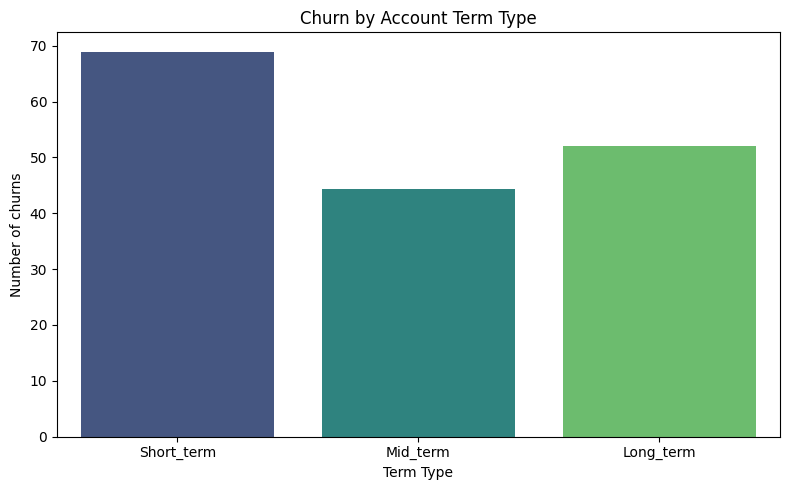

In [158]:
# Plot churn counts by term type
plt.figure(figsize=(8,5))
sns.barplot(data=years_churn, x='term_type', y='churn_rate', palette='viridis')
plt.title('Churn by Account Term Type')
plt.ylabel('Number of churns')
plt.xlabel('Term Type')
plt.tight_layout()
plt.show()

Insights:
- Churn rate peaks at Year 0 which indicates that there could be an issue with initial onboarding by the bank due to which the bank is not able to keep the customers with them.
- Churn rate drops with years until year 7 (39.44%), then it starts to rise again. When we segment the customers in short, medium, and long term, we see the same pattern with medium tenure customers churning the least (44.3%).
- Short term customers churn the most (68.94%), the bank can run loyalty programs or discounts/low interest of loans for long term users to attract people to stay for long.
- Bank is also losing long term customers (55.2%). Customer outreach programs can be held to tell them about new services and offers.

#### Risk vs Churn

In [162]:
risk_churn = df.groupby("risk")['churn'].agg(churn='sum', count='count')
risk_churn['churn_rate'] = (risk_churn['churn']/risk_churn['count']*100).round(2)
risk_churn = risk_churn.reset_index().sort_values('churn_rate', ascending=False)
risk_churn

,risk,churn,count,churn_rate
0,HIGH,3658,5079,72.02
2,MEDIUM,114732,208790,54.95
1,LOW,103519,197283,52.47


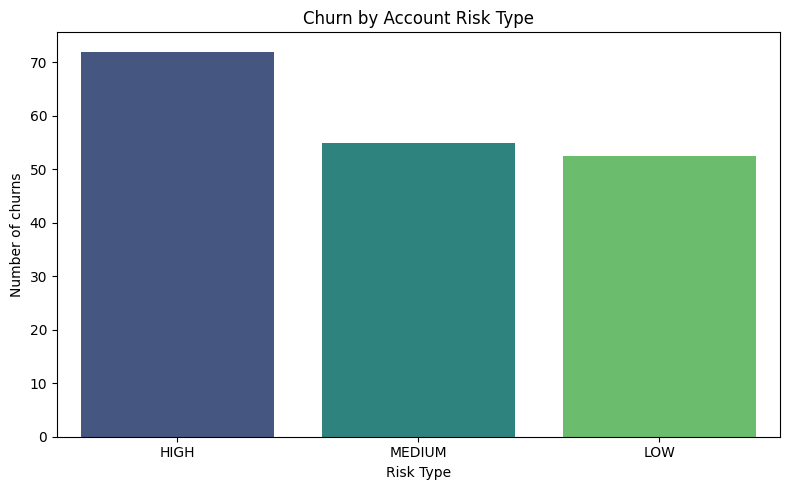

In [163]:
# Plot churn counts by term type
plt.figure(figsize=(8,5))
sns.barplot(data=risk_churn, x='risk', y='churn_rate', palette='viridis')
plt.title('Churn by Account Risk Type')
plt.ylabel('Number of churns')
plt.xlabel('Risk Type')
plt.tight_layout()
plt.show()

- High risk customers churn the more than low risk and medium risk customers with 18.31pp more on average.

#### Currency vs Churn

In [96]:
currency_churn = df.groupby("currency")['churn'].agg(["sum", 'count'])
currency_churn['churn_rate'] = currency_churn['sum']/currency_churn['count']*100
currency_churn = currency_churn.reset_index().sort_values('churn_rate', ascending=False)
currency_churn = currency_churn[currency_churn['count'] > 400]

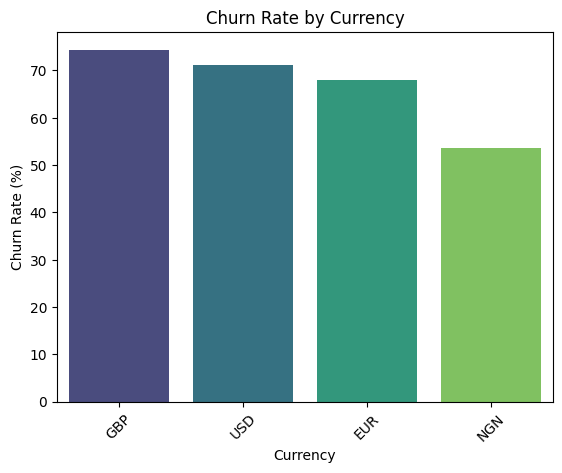

In [97]:
sns.barplot(data=currency_churn, x='currency', y='churn_rate', palette='viridis')
plt.title('Churn Rate by Currency')
plt.xlabel('Currency')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

- The bank is losing it's premium customers which have accounts in foreign currencies like USD, GBP, EUR.

#### Scheme vs Churn

In [98]:
scheme_churn = df.groupby('scheme')['churn'].agg(['sum', 'count'])
scheme_churn['churn_rate'] = scheme_churn['sum']/scheme_churn['count']*100
scheme_churn = scheme_churn.reset_index().sort_values('churn_rate', ascending=False)

In [99]:
scheme_churn

,scheme,sum,count,churn_rate
3,TDA,421,421,100.000000
0,CAA,2800,4459,62.794349
2,SBA,167259,292959,57.092972
1,ODA,51429,113313,45.386672


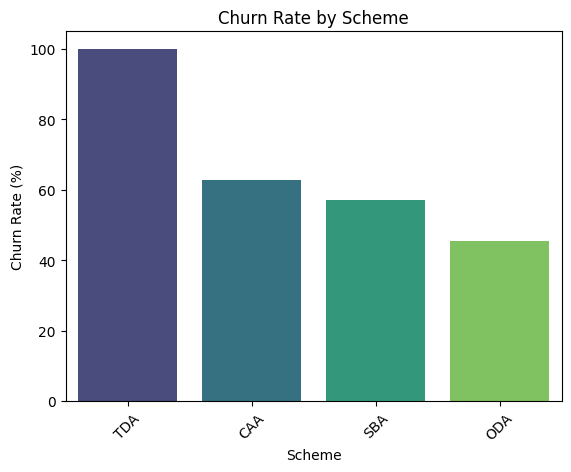

In [100]:
sns.barplot(data=scheme_churn, x='scheme', y='churn_rate', palette='viridis')
plt.title('Churn Rate by Scheme')
plt.xlabel('Scheme')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

- All TDA scheme users churned from the bank, showing the product did not work and moreover made the customer lose interest in the bank as a whole.
- ODA accounts have the least churn rate with 45.38%.

In [170]:
plot_df = df.groupby(['scheme', 'years'])['churn'].agg(churn='sum', count='count')
plot_df['churn_rate'] = plot_df['churn']/plot_df['count']*100
plot_df = plot_df.reset_index()
plot_df

,scheme,years,churn,count,churn_rate
0,CAA,0,142,142,100.000000
1,CAA,1,682,682,100.000000
2,CAA,2,178,178,100.000000
3,CAA,3,43,44,97.727273
4,CAA,4,57,57,100.000000
5,CAA,5,47,48,97.916667
6,CAA,6,160,292,54.794521
7,CAA,7,293,548,53.467153
8,CAA,8,349,927,37.648328
9,CAA,9,291,652,44.631902


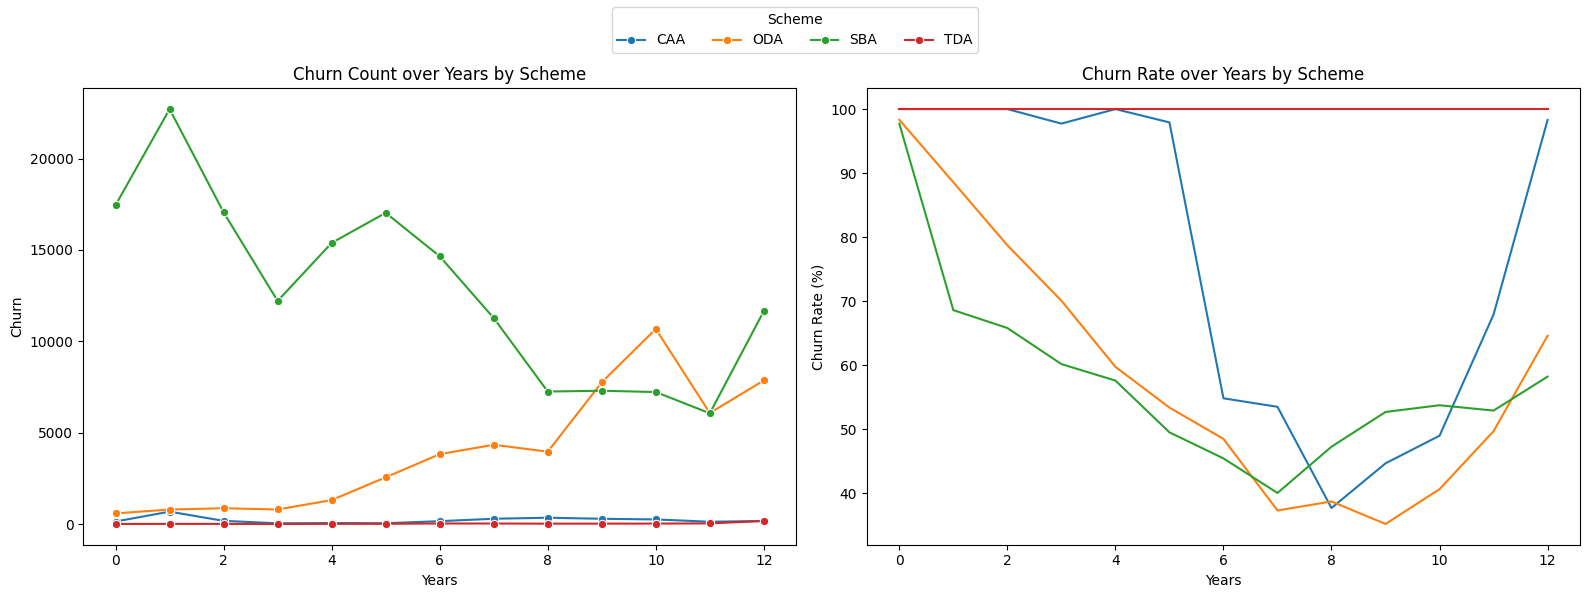

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Churn count
sns.lineplot(
    data=plot_df,
    x='years',
    y='churn',
    hue='scheme',
    marker='o',
    ax=axes[0]
)
axes[0].set_title('Churn Count over Years by Scheme')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Churn')

# Churn rate
sns.lineplot(
    data=plot_df,
    x='years',
    y='churn_rate',
    hue='scheme',
    palette='tab10',
    ax=axes[1]
)
axes[1].set_title('Churn Rate over Years by Scheme')
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Churn Rate (%)')

# Single legend (cleaner)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Scheme', loc='upper center', ncol=len(labels))

# Remove individual legends
axes[0].legend_.remove()
axes[1].legend_.remove()

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


- Most churn occurs at year 0-5 for SBA accounts. With time churn occurances decreases.
- Churn Count of ODA account increases with tenure with max at year 10. 

### Does digital adoption actually reduce churn, or are we just pushing apps for nothing?

In [102]:
digital_channels_df = df.groupby('digital_channels_used').agg({'churn': 'sum'}).sort_values('churn', ascending=False).reset_index()
digital_channels_df

,digital_channels_used,churn
0,3,94315
1,1,61964
2,0,38787
3,2,26843


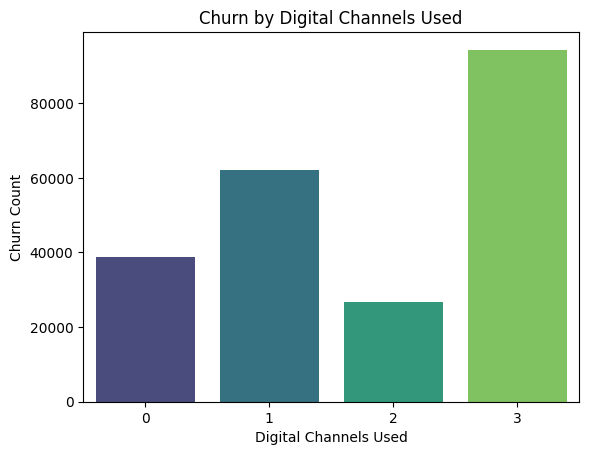

In [103]:
sns.barplot(data=digital_channels_df, x='digital_channels_used', y='churn', palette='viridis')
plt.title('Churn by Digital Channels Used')
plt.xlabel('Digital Channels Used')
plt.ylabel('Churn Count')
plt.show()

- The more an account uses digital banking, they churn more as shown by data where the users with all digital channels usage churn the most. Although the least churned users are the ones which use 2 digital channels, signifying a deep analysis has to be done.

In [104]:
churned = df[df['churn'] == 1]

app_only_c = churned[
    (churned['mobile_app'] == 1) &
    (churned['internet_banking'] == 0) &
    (churned['ussd_banking'] == 0)
]

internet_only_c = churned[
    (churned['mobile_app'] == 0) &
    (churned['internet_banking'] == 1) &
    (churned['ussd_banking'] == 0)
]

ussd_only_c = churned[
    (churned['mobile_app'] == 0) &
    (churned['internet_banking'] == 0) &
    (churned['ussd_banking'] == 1)
]

not_churned = df[df['churn'] == 0]

app_only_nc = not_churned[
    (not_churned['mobile_app'] == 1) &
    (not_churned['internet_banking'] == 0) &
    (not_churned['ussd_banking'] == 0)
]

internet_only_nc = not_churned[
    (not_churned['mobile_app'] == 0) &
    (not_churned['internet_banking'] == 1) &
    (not_churned['ussd_banking'] == 0)
]

ussd_only_nc = not_churned[
    (not_churned['mobile_app'] == 0) &
    (not_churned['internet_banking'] == 0) &
    (not_churned['ussd_banking'] == 1)
]


In [105]:
channel_churn = pd.DataFrame({
    'channel' : ['ussd_only', 'internet_banking_only', 'mobile_only'],
    'churned': [len(ussd_only_c), len(internet_only_c), len(app_only_c)],
    'not_churned': [len(ussd_only_nc), len(internet_only_nc), len(app_only_nc)],
    'total': [len(ussd_only_c)+len(ussd_only_nc), len(internet_only_c)+ len(internet_only_nc), len(app_only_c)+len(app_only_nc)]
})

channel_churn['churn_rate'] = round(channel_churn['churned']/channel_churn['total']*100, 2)
channel_churn

,channel,churned,not_churned,total,churn_rate
0,ussd_only,57281,20390,77671,73.75
1,internet_banking_only,4606,9494,14100,32.67
2,mobile_only,77,309,386,19.95


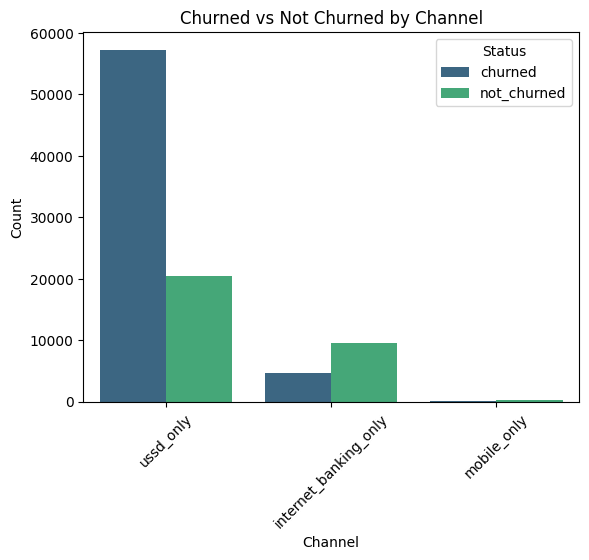

In [106]:
melted = channel_churn.melt(id_vars='channel', value_vars=['churned', 'not_churned'], var_name='Status', value_name='count')
sns.barplot(data=melted, x='channel', y='count', hue='Status', palette='viridis')
plt.title('Churned vs Not Churned by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

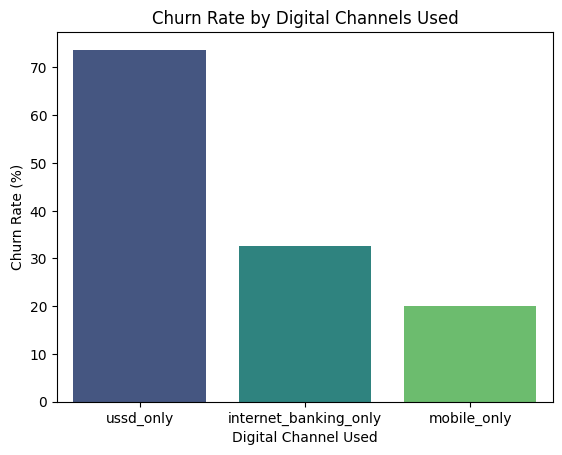

In [107]:
sns.barplot(data=channel_churn, x='channel', y='churn_rate', palette='viridis')
plt.title('Churn Rate by Digital Channels Used')
plt.xlabel('Digital Channel Used')
plt.ylabel('Churn Rate (%)')
plt.show()

- USSD-only users churn more (73.75%) than app only (19.95%) and internet banking only (32.67%) users which shows there is feature gap in the service.
- More users must be introduced to Mobile App as data shows mobile app adoption is small because it has the least churn rate. The bank can put in efforts to market it's mobile apps to the USSD only users.

### Which customers should relationship managers prioritize?

- High value + low churn → protect

- High value + high churn → urgent intervention

- Low value + high churn → ignore

Customer Value Score = 0.5 × ave_bal + 0.3 × credit_val + 0.2 × debit_val

In [184]:
customer_val = df.copy()
customer_val['Customer_Value_Score'] = (0.5 * df['ave_bal']) + (0.3 * df['credit_val']) + (0.2 * df['debit_val'])


In [185]:
# Normalise the Customer_Value_Score with Min-Max Scaling
customer_val['Customer_Value_Score'] = (customer_val['Customer_Value_Score'] - customer_val['Customer_Value_Score'].min()) / (customer_val['Customer_Value_Score'].max() - customer_val['Customer_Value_Score'].min())


Segment Customers
- Top 20% : High Value
- Middle 50% : Medium Value
- Bottom 30% : Low value

In [186]:
customer_val['customer_val'] = pd.qcut(
    customer_val['Customer_Value_Score'], q=[0, 0.3, 0.8, 1.0], labels=['Low', 'Medium', 'High'])

In [187]:
customer_val = customer_val.groupby(['customer_val', 'risk'])['churn'].agg(churn='sum', count='count')
customer_val['churn_rate'] = round(customer_val['churn']/customer_val['count']*100, 2)
customer_val = customer_val.reset_index()
customer_val

,customer_val,risk,churn,count,churn_rate
0,Low,HIGH,14,353,3.97
1,Low,LOW,1891,63422,2.98
2,Low,MEDIUM,1947,59571,3.27
3,Medium,HIGH,693,1711,40.50
4,Medium,LOW,61456,93358,65.83
5,Medium,MEDIUM,74306,110506,67.24
6,High,HIGH,2951,3015,97.88
7,High,LOW,40172,40503,99.18
8,High,MEDIUM,38479,38713,99.40


High Value Customers in general are the majority Churners.
- Personalized, Human Outreach: Instead of automated emails, have Customer Success Managers (CSMs) make a direct, personalized call or email to check in, not to sell.
- "We Miss You" Campaigns with Value: Send personalized messages highlighting new features or unused benefits that are relevant to their specific business use case.
- Feedback Loops: Ask for feedback on why they have gone quiet, using surveys or direct outreach to uncover pain points before they become insurmountable. 
- Milestone-Based Incentives: Reward loyal, long-term customers with exclusive perks, such as access to premium features, loyalty rewards, or early access to new products.

### Are foreign currency customers more loyal and profitable?

In [114]:
cur_ave_bal = (
    df.groupby('currency')
      .agg(
          ave_bal=('ave_bal', 'mean'),
          churn=('churn', 'sum'),
          currency_count=('currency', 'count')
      )
      .sort_values('ave_bal', ascending=False)
      .reset_index()
)
cur_ave_bal['churn_rate'] = round(cur_ave_bal['churn']/cur_ave_bal['currency_count']*100, 2)
cur_ave_bal = cur_ave_bal[cur_ave_bal['currency_count'] > 400]
cur_ave_bal

,currency,ave_bal,churn,currency_count,churn_rate
0,USD,3.246517e+06,5392,7582,71.12
1,GBP,1.325368e+06,637,856,74.42
2,EUR,7.118536e+05,306,450,68.00
4,NGN,1.680980e+05,215531,402191,53.59


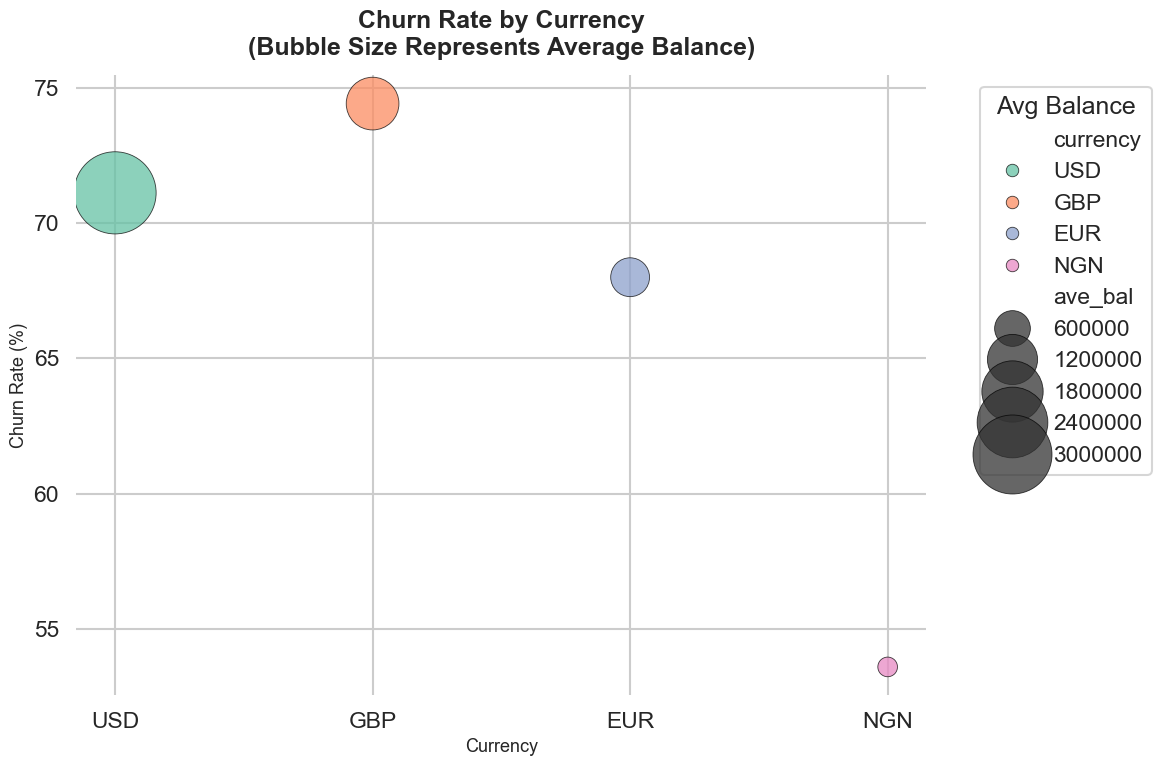

In [192]:
# Style
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(12, 8))

ax = sns.scatterplot(
    data=cur_ave_bal,
    x="currency",
    y="churn_rate",
    size="ave_bal",
    hue="currency",          # subtle color differentiation
    palette="Set2",
    sizes=(200, 3500),
    alpha=0.75,
    edgecolor="black",
    linewidth=0.6,
    legend="brief"
)

# Titles & labels
ax.set_title(
    "Churn Rate by Currency\n(Bubble Size Represents Average Balance)",
    fontsize=18,
    weight="bold",
    pad=15
)
ax.set_xlabel("Currency", fontsize=13)
ax.set_ylabel("Churn Rate (%)", fontsize=13)

# Improve legend
plt.legend(
    title="Avg Balance",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    frameon=True
)

# Clean up
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


- USD customers have 19x more Average Balance than local NGN customers and total 97.49% lower churn.
- Although, USD Customers have less churn than NGN Customers, the Churn Rate is more by 17.53pp.

### Does credit card ownership meaningfully reduce churn?

In [121]:
cc_df = df[df['credit_card'] == 1]
churn_rate_cc_1 = round((cc_df['churn'].sum()/df['churn'].count()*100), 2)
churn_rate_cc_1

np.float64(0.04)

In [122]:
cc_df = df[df['credit_card'] == 0]
churn_rate_cc_0 = round((cc_df['churn'].sum()/df['churn'].count()*100), 2)
churn_rate_cc_0

np.float64(53.93)

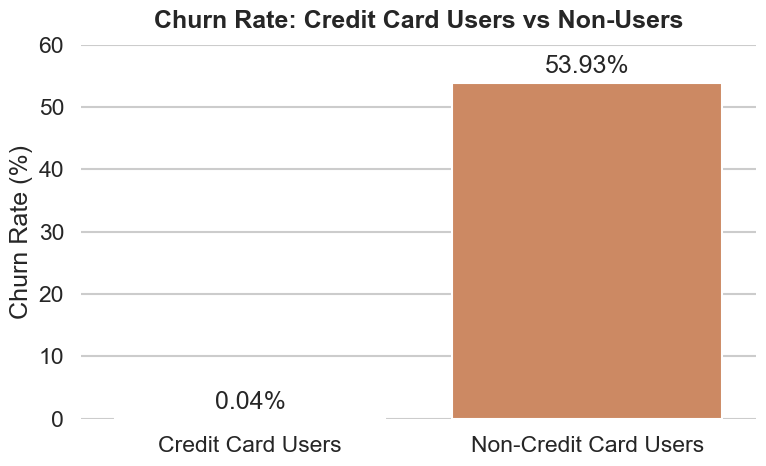

In [195]:
# Prepare data
plot_df = pd.DataFrame({
    "Group": ["Credit Card Users", "Non-Credit Card Users"],
    "Churn Rate (%)": [churn_rate_cc_1, churn_rate_cc_0]
})
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=plot_df,
    x="Group",
    y="Churn Rate (%)",
    palette=["#4C72B0", "#DD8452"]
)

# Labels & title
ax.set_title("Churn Rate: Credit Card Users vs Non-Users", weight="bold", pad=12)
ax.set_xlabel("")
ax.set_ylabel("Churn Rate (%)")
ax.set_ylim(0, 60)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", padding=3)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Insights:
- Credit Card users have a significant less churn rate than Non-Credit Card users.
- The bank can have best improvement in churn rate by promoting Credit Card.

### Hypothesis Testing

#### Question: Does customer churn differ by account currency (NGN, USD, EUR, etc.), or are churn rates the same regardless of currency?

- H₀ (Null hypothesis):
Currency type and churn are independent
(currency has no association with churn)

- H₁ (Alternative hypothesis):
Currency type and churn are associated
(churn differs by currency)

Method: Chi-square test of independence

In [129]:
contingency = df.groupby('currency').agg(
    churned=('churn', 'sum'),
    non_churned=('churn', lambda x: (x == 0).sum())
).reset_index()

contingency['total_customers'] = contingency['churned'] + contingency['non_churned']
contingency = contingency[contingency['total_customers'] >= 100] # Filter currencies with at least 100 customers

In [130]:
from scipy.stats import chi2_contingency

contingency1 = contingency[["churned", "non_churned"]].values

chi2, p, dof, expected = chi2_contingency(contingency1)

print(f"Chi-square statistic: {chi2:.4f}, P-Value: {p}")
if p < 0.05:
    print("Reject H₀ : There is a statistically significant association between currency type and churn.")
else:
    print("Reject H₁: We do not find sufficient evidence that churn differs by currency.")

Chi-square statistic: 1100.4135, P-Value: 2.9604407071238254e-238
Reject H₀ : There is a statistically significant association between currency type and churn.


In [131]:
contingency['churn_rate'] = contingency['churned'] / (contingency['churned'] + contingency['non_churned']) * 100

contingency.sort_values('churn_rate', ascending=False)

,currency,churned,non_churned,total_customers,churn_rate
2,GBP,637,219,856,74.415888
4,USD,5392,2190,7582,71.115801
1,EUR,306,144,450,68.000000
3,NGN,215531,186660,402191,53.589215


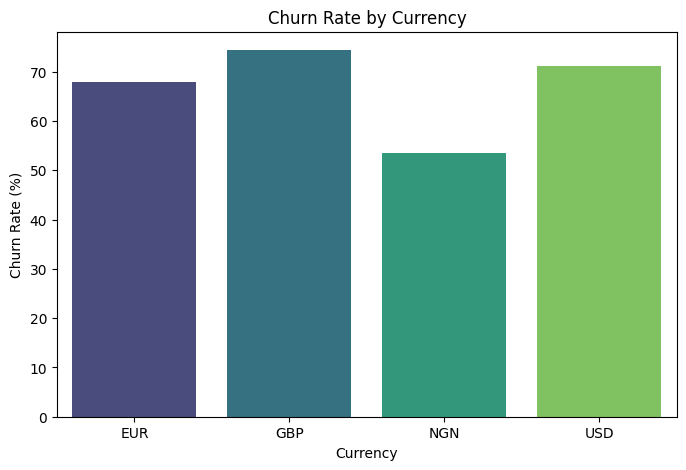

In [132]:
plt.figure(figsize=(8,5))
sns.barplot(data=contingency, x='currency', y='churn_rate', palette='viridis')
plt.xlabel('Currency')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Currency')
plt.show()

- Result : The test indicates a statistically significant association between currency and churn (p < 0.01).
- Key insight:
Foreign Currency Customers churn ~20 percentage points on average more than NGN customers.

#### Business implication:
FX customers represent a more stable segment and should be prioritized for premium retention and cross-sell strategies.